In [1]:
import sys
import os
import yaml
from PIL import Image
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(".."))

In [2]:
# Импортируем функцию для определения корня проекта
sys.path.append(os.path.abspath("../scripts"))
from utils import get_project_root

# Добавляем корень проекта в sys.path
sys.path.append(get_project_root())

project_root = get_project_root()
params_path = os.path.join(project_root, "params.yaml")

from scripts.utils import get_project_paths

with open(params_path, "r") as f:
    params = yaml.safe_load(f)
    paths = get_project_paths()

# Изучение трансфера модели. 

## Часть1. Обучение базовой модели imagenet 
Обучаем на CNN. Кол-во классов -10

### Загружаем данные после обучения

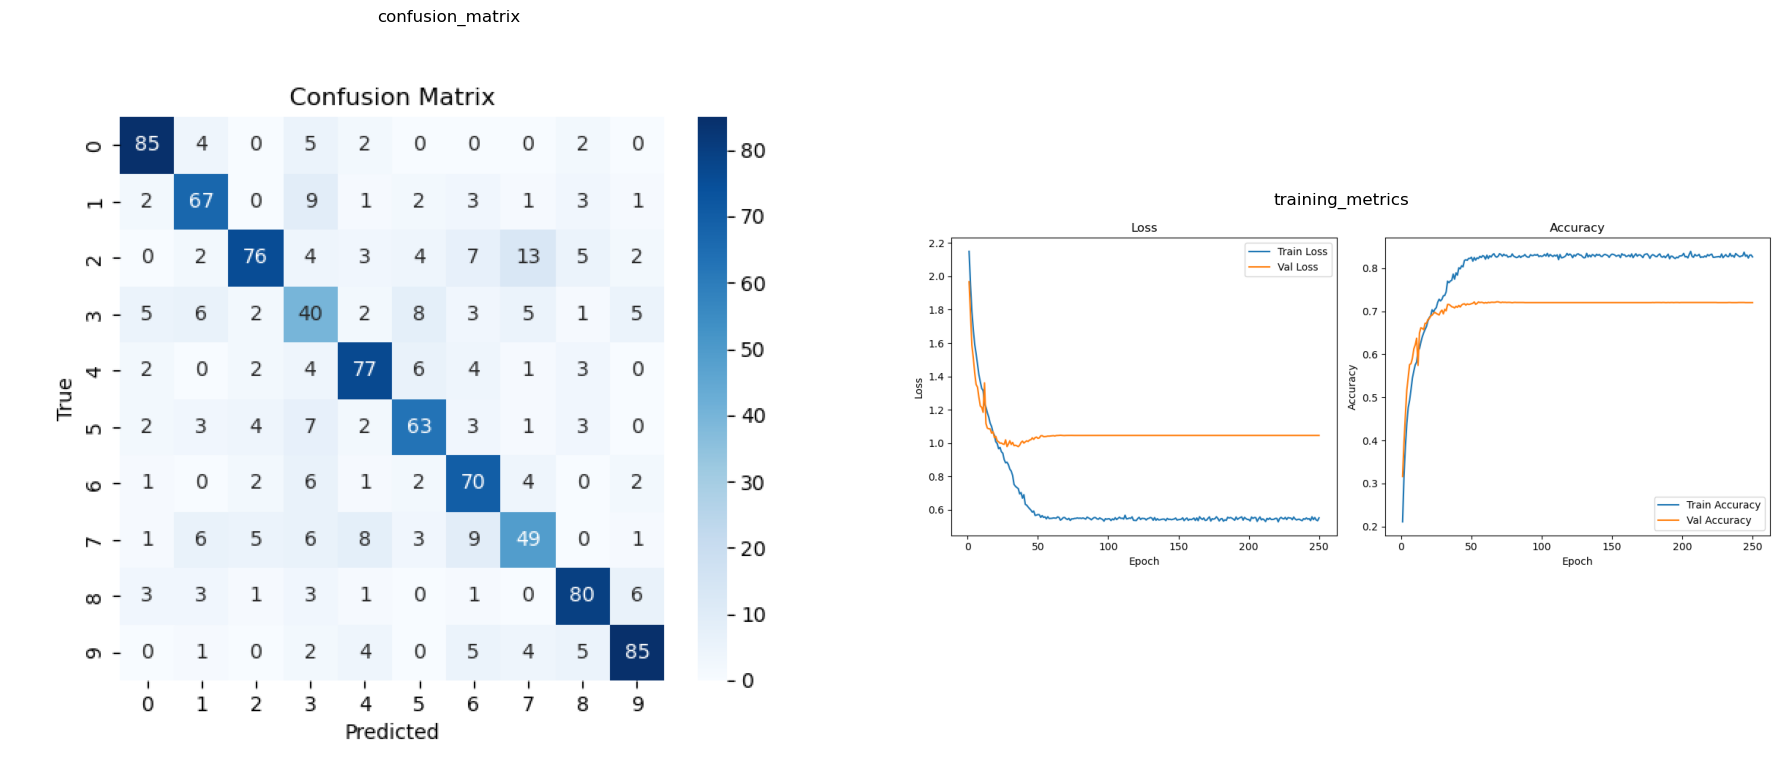

In [4]:
img1 = Image.open(paths['image_dir']/"imagenette_confusion_matrix.png") 
img2 = Image.open(paths['image_dir']/"imagenette_training_metrics.png") 

# Создаем фигуру с 1 строкой и 2 столбцами
fig, axs = plt.subplots(1, 2, figsize=(18, 8))  # (рядов, колонок)

# Отображаем первое изображение
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title("confusion_matrix")

# Отображаем второе изображение
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title("training_metrics")

# Показываем все вместе
plt.tight_layout()
plt.show()


val_accuracy
0.7202547770700637

### Вывод: Графики обучения терпимые. Матрица ошибок более чем хорошая.Будем пробовать трасфернуть эту матрицу в OxfordsPets

# Часть 2. OxfordsPets

## 2.1 Транфер модели без заморозки слоев

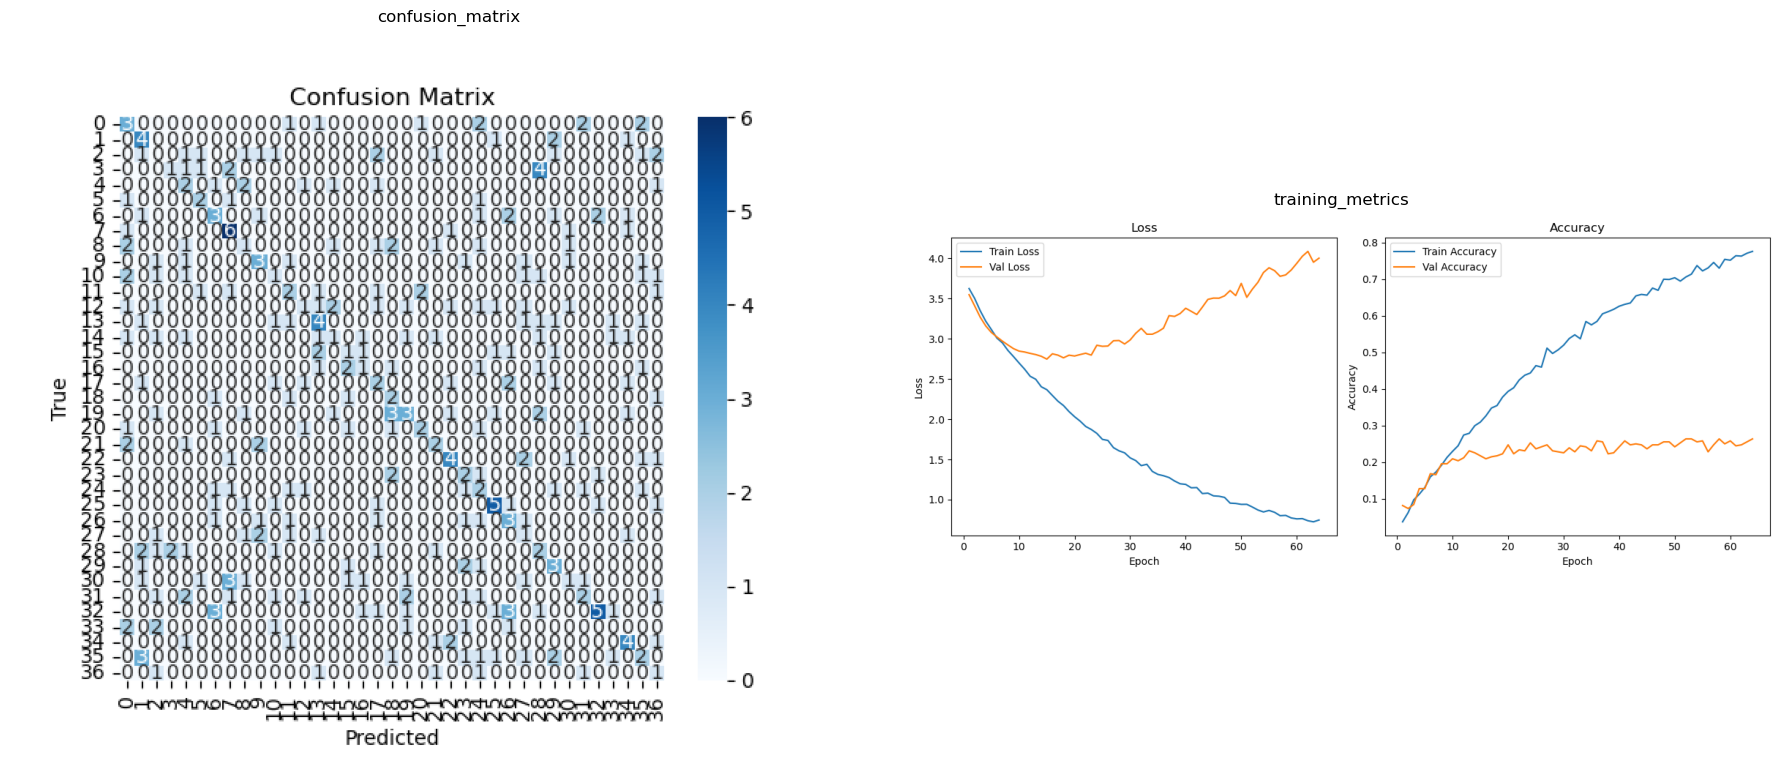

In [6]:
img1 = Image.open(paths['image_dir']/"mnist_nofrease_confusion_matrix.png") 
img2 = Image.open(paths['image_dir']/"oxford_no_frease_training_metrics.png") 

# Создаем фигуру с 1 строкой и 2 столбцами
fig, axs = plt.subplots(1, 2, figsize=(18, 8))  # (рядов, колонок)

# Отображаем первое изображение
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title("confusion_matrix")

# Отображаем второе изображение
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title("training_metrics")

# Показываем все вместе
plt.tight_layout()
plt.show()

In [ ]:
val_accuracy
0.2717391304347826

## 2.1 Транфер модели с полной заморозкой слоев

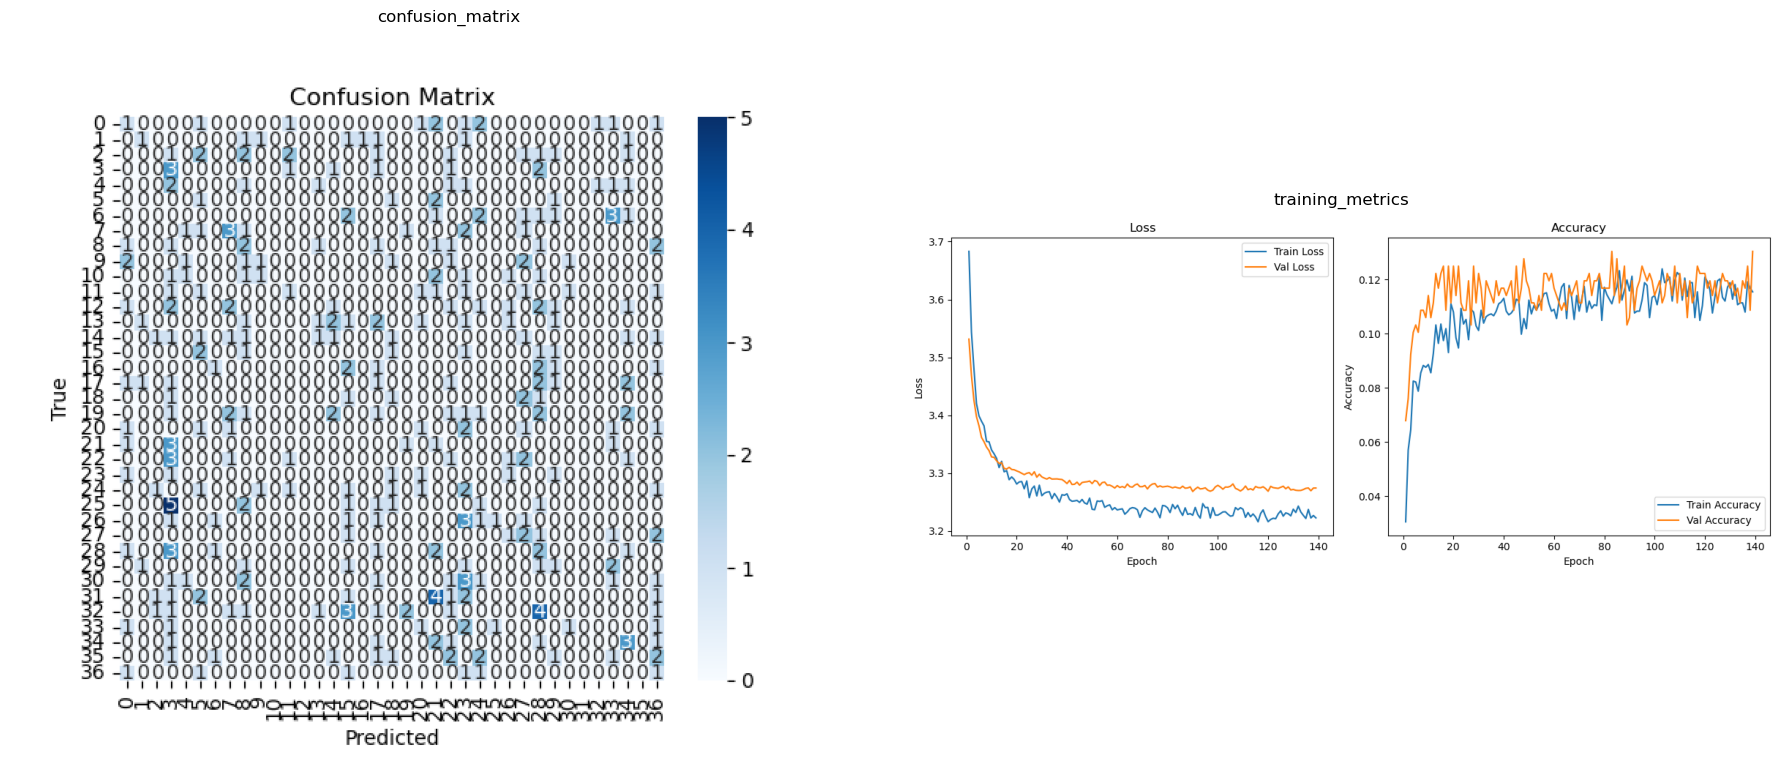

In [7]:
img1 = Image.open(paths['image_dir']/"oxford_full_frease_confusion_matrix.png") 
img2 = Image.open(paths['image_dir']/"oxford_full_frease_training_metrics.png") 

# Создаем фигуру с 1 строкой и 2 столбцами
fig, axs = plt.subplots(1, 2, figsize=(18, 8))  # (рядов, колонок)

# Отображаем первое изображение
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title("confusion_matrix")

# Отображаем второе изображение
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title("training_metrics")

# Показываем все вместе
plt.tight_layout()
plt.show()

### Матрциа ужасная, графики плохие. И точность низкая. и снвоа полная заморозка показа себ яхуже чем ее отсуствие

## 2.3 Транфер модели с полной заморозкой слоев и разморозкой посреди обучения

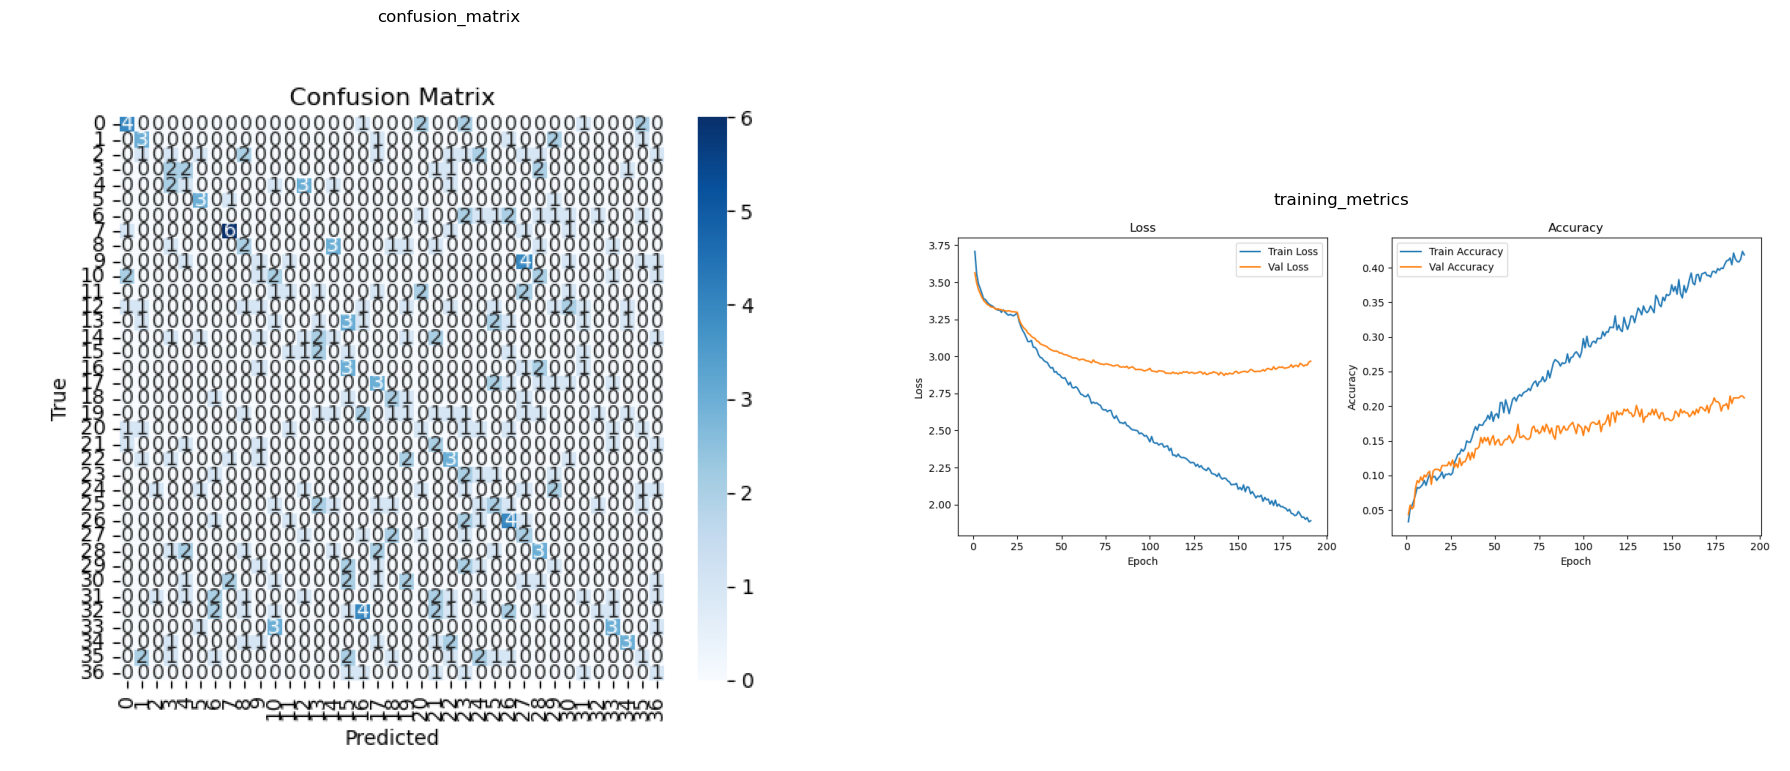

In [8]:
img1 = Image.open(paths['image_dir']/"oxford_part_frease_confusion_matrix.png") 
img2 = Image.open(paths['image_dir']/"oxford_part_frease_training_metrics.png") 

# Создаем фигуру с 1 строкой и 2 столбцами
fig, axs = plt.subplots(1, 2, figsize=(18, 8))  # (рядов, колонок)

# Отображаем первое изображение
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title("confusion_matrix")

# Отображаем второе изображение
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title("training_metrics")

# Показываем все вместе
plt.tight_layout()
plt.show()

val_accuracy
0.21195652173913043

### Мы снвоа получили что полная замаорозка = худший вариант. Но сам сет очнеь плохой

## 2.4 Транфер предобученной модели Pytorch Resnet18 с полной заморозкой слоев и разморозкой посреди обучения

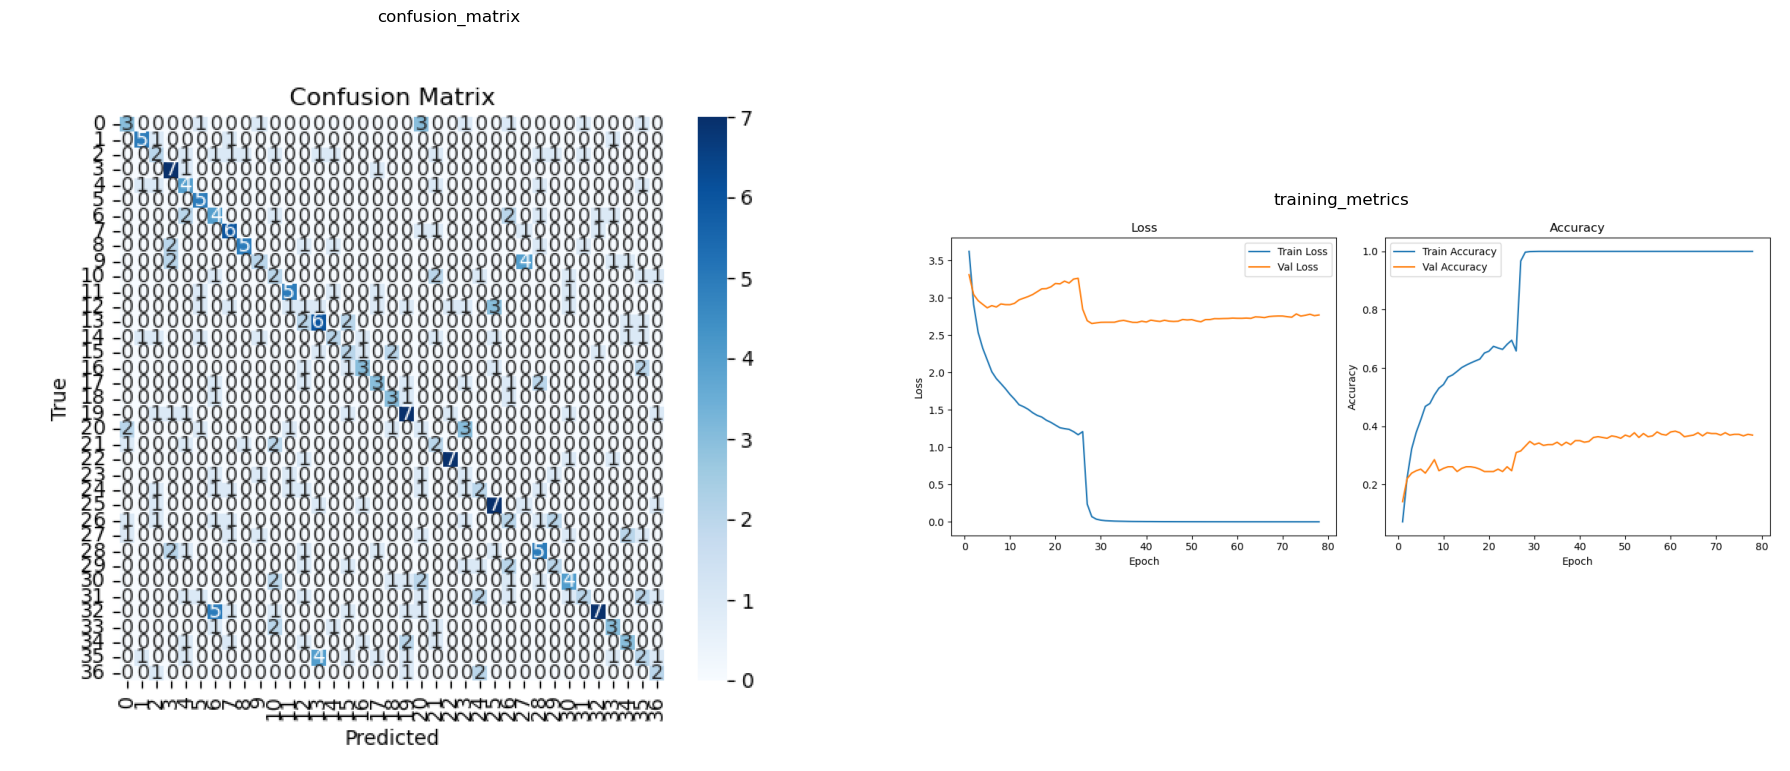

In [4]:
img1 = Image.open(paths['image_dir']/"resnet18_oxford_confusion_matrix.png") 
img2 = Image.open(paths['image_dir']/"resnet18_oxford_metrics.png") 

# Создаем фигуру с 1 строкой и 2 столбцами
fig, axs = plt.subplots(1, 2, figsize=(18, 8))  # (рядов, колонок)

# Отображаем первое изображение
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title("confusion_matrix")

# Отображаем второе изображение
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title("training_metrics")

# Показываем все вместе
plt.tight_layout()
plt.show()

In [ ]:
val_accuracy
0.3423913043478261

### Pytorch Resnet18 модль ожидаемо покзала себя лучше.Но не намного, что подтверждает факт о слабом сете!  Снова очевидное переобучение 

# Часть 3. Animals10

## 3.1 Транфер модели без заморозки слоев

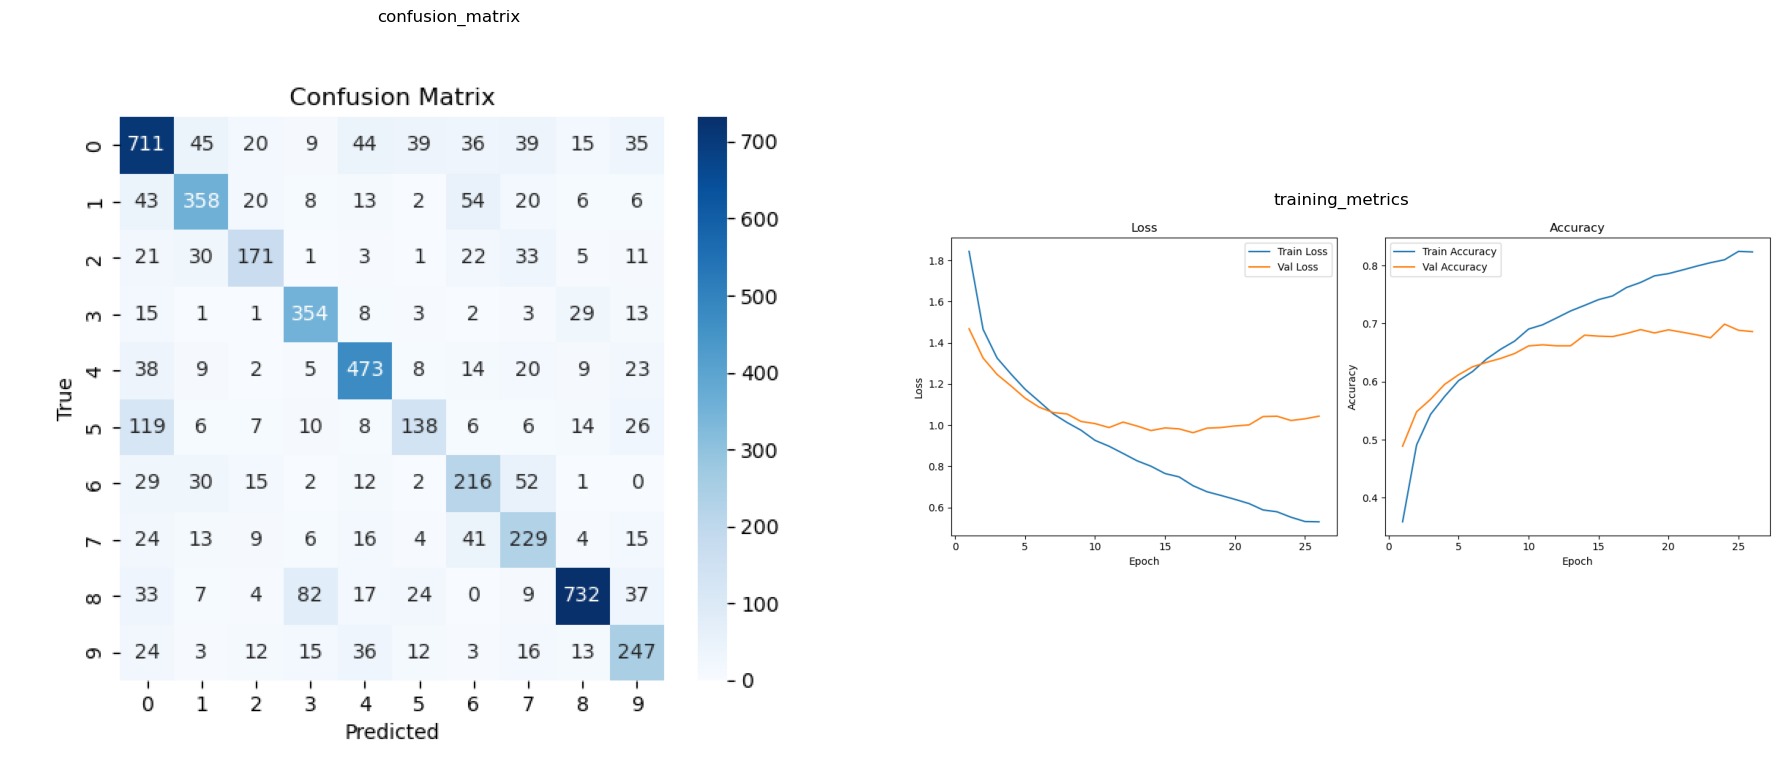

In [3]:
img1 = Image.open(paths['image_dir']/"mnist_nofrease_confusion_matrix.png") 
img2 = Image.open(paths['image_dir']/"animals_no_frease_training_metrics.png") 

# Создаем фигуру с 1 строкой и 2 столбцами
fig, axs = plt.subplots(1, 2, figsize=(18, 8))  # (рядов, колонок)

# Отображаем первое изображение
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title("confusion_matrix")

# Отображаем второе изображение
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title("training_metrics")

# Показываем все вместе
plt.tight_layout()
plt.show()

In [ ]:
val_accuracy
0.6861509073543457

### Новый сет ощутимо лучше.Но ошибка довольно высока, поэтому точность поулчилсь в районе 68%

## 3.2 Транфер модели с заморозкой слоев

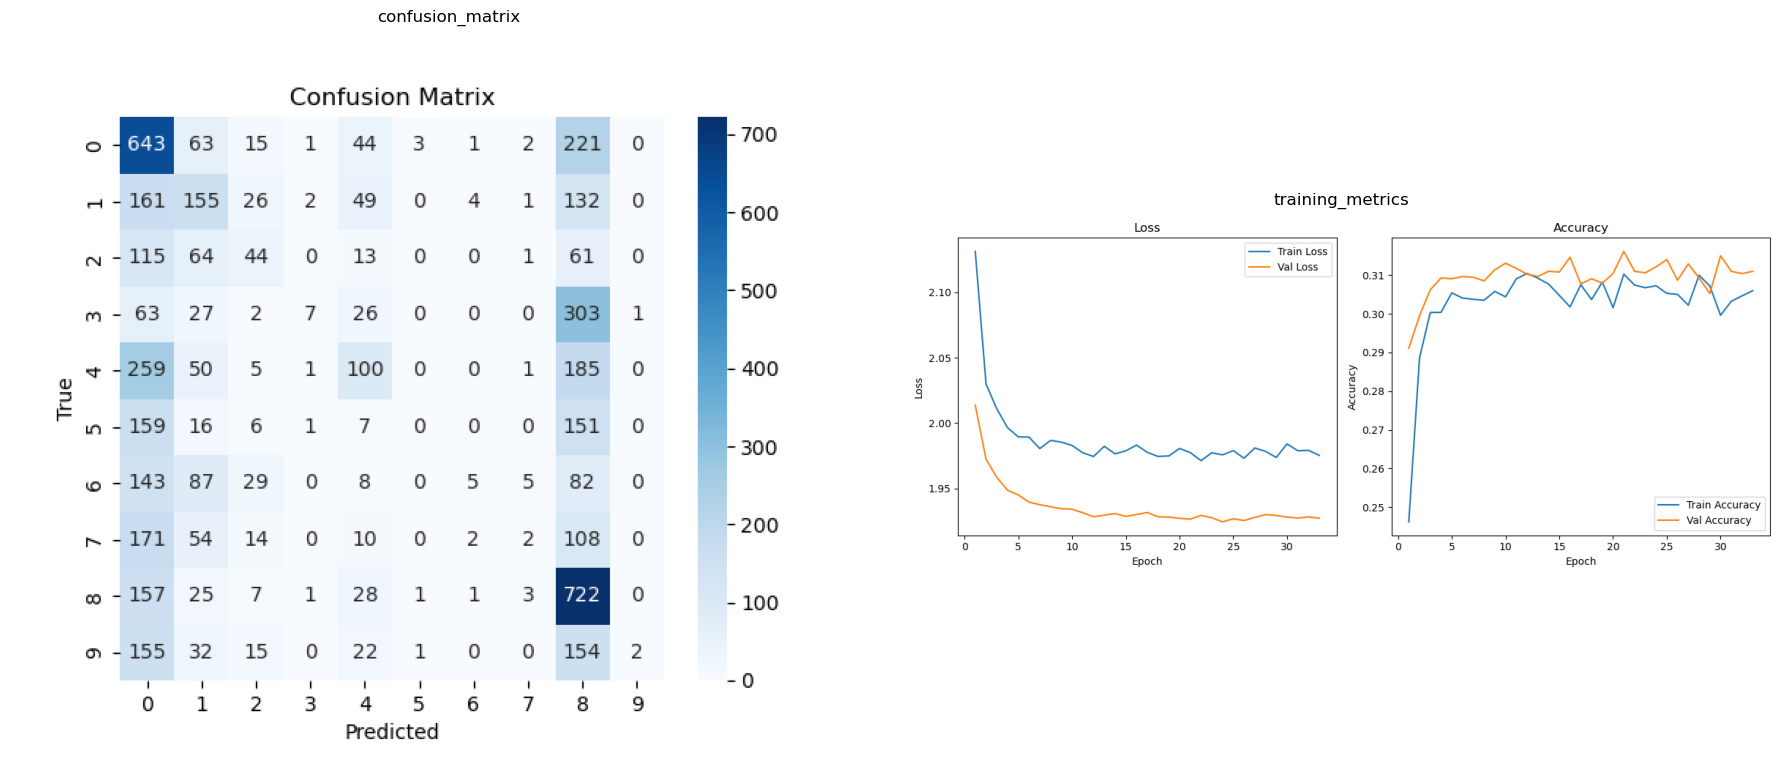

In [4]:
img1 = Image.open(paths['image_dir']/"animals_full_freese_confusion_matrix.png") 
img2 = Image.open(paths['image_dir']/"animals_full_frease_training_metrics.png") 

# Создаем фигуру с 1 строкой и 2 столбцами
fig, axs = plt.subplots(1, 2, figsize=(18, 8))  # (рядов, колонок)

# Отображаем первое изображение
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title("confusion_matrix")

# Отображаем второе изображение
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title("training_metrics")

# Показываем все вместе
plt.tight_layout()
plt.show()

In [ ]:
Test accuracy: 32.08%

### Ощутимо хуже чем вообще без заморозки. Точность упала аж до 32

## 3.3 Транфер модели с заморозкой слоев и последующей разморозкой посреди обучения

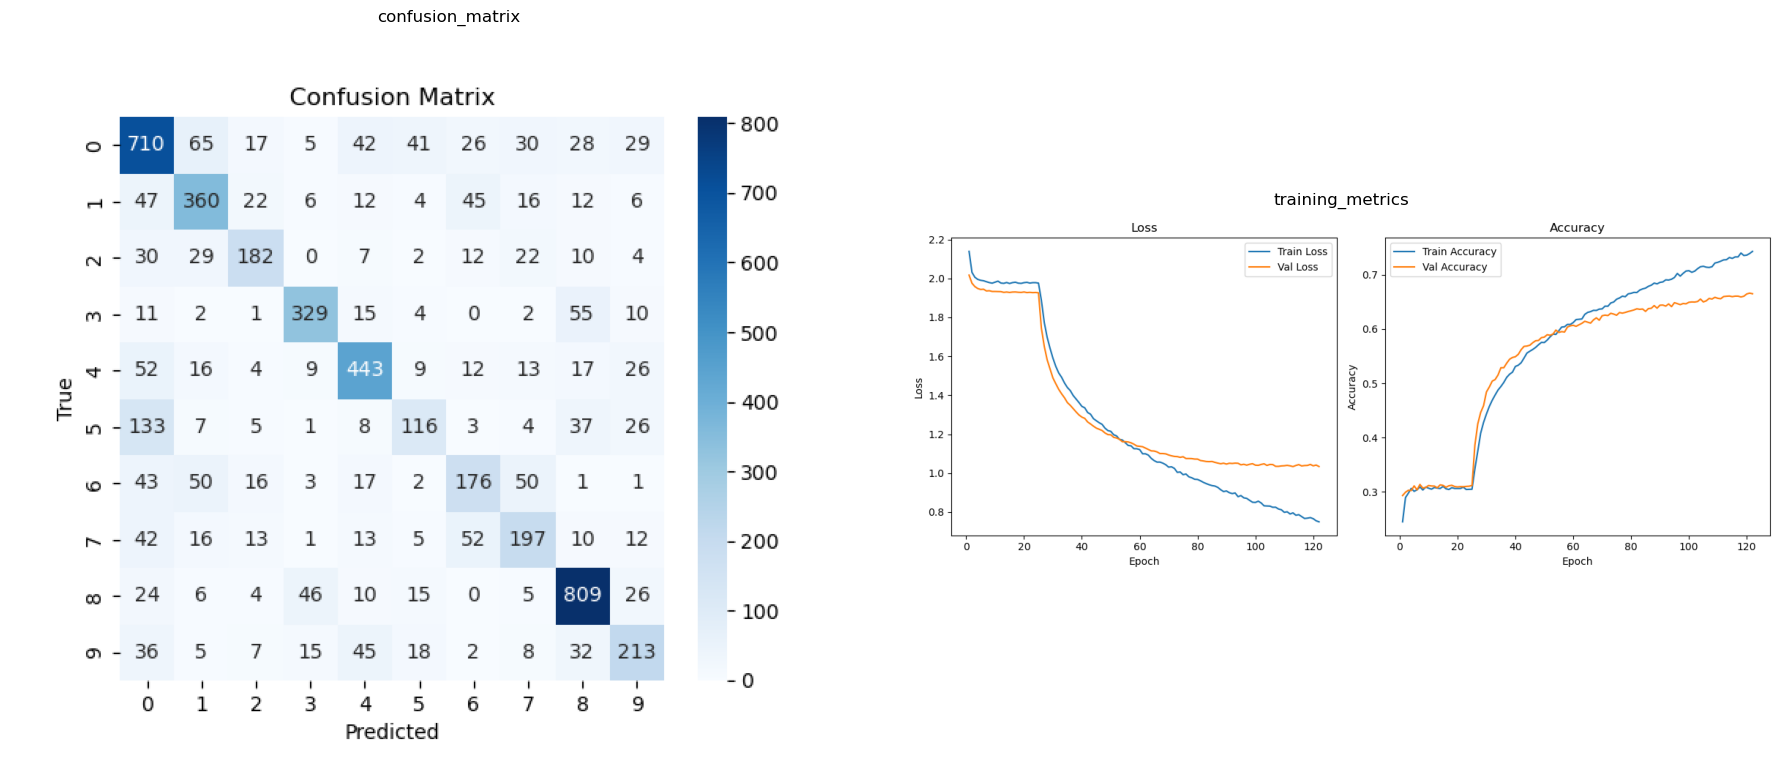

In [5]:
img1 = Image.open(paths['image_dir']/"animals_part_freese_confusion_matrix.png") 
img2 = Image.open(paths['image_dir']/"animals_part_frease_training_metrics.png") 

# Создаем фигуру с 1 строкой и 2 столбцами
fig, axs = plt.subplots(1, 2, figsize=(18, 8))  # (рядов, колонок)

# Отображаем первое изображение
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title("confusion_matrix")

# Отображаем второе изображение
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title("training_metrics")

# Показываем все вместе
plt.tight_layout()
plt.show()

In [ ]:
Test accuracy: 67.50%

### И снова частичная разморозка показаса себя по точности равно как и вариант без заморозки. Но по графикам можель мнее склонна к переобучению

## 2.4 Транфер предобученной модели Pytorch Resnet18 с полной заморозкой слоев и разморозкой посреди обучения

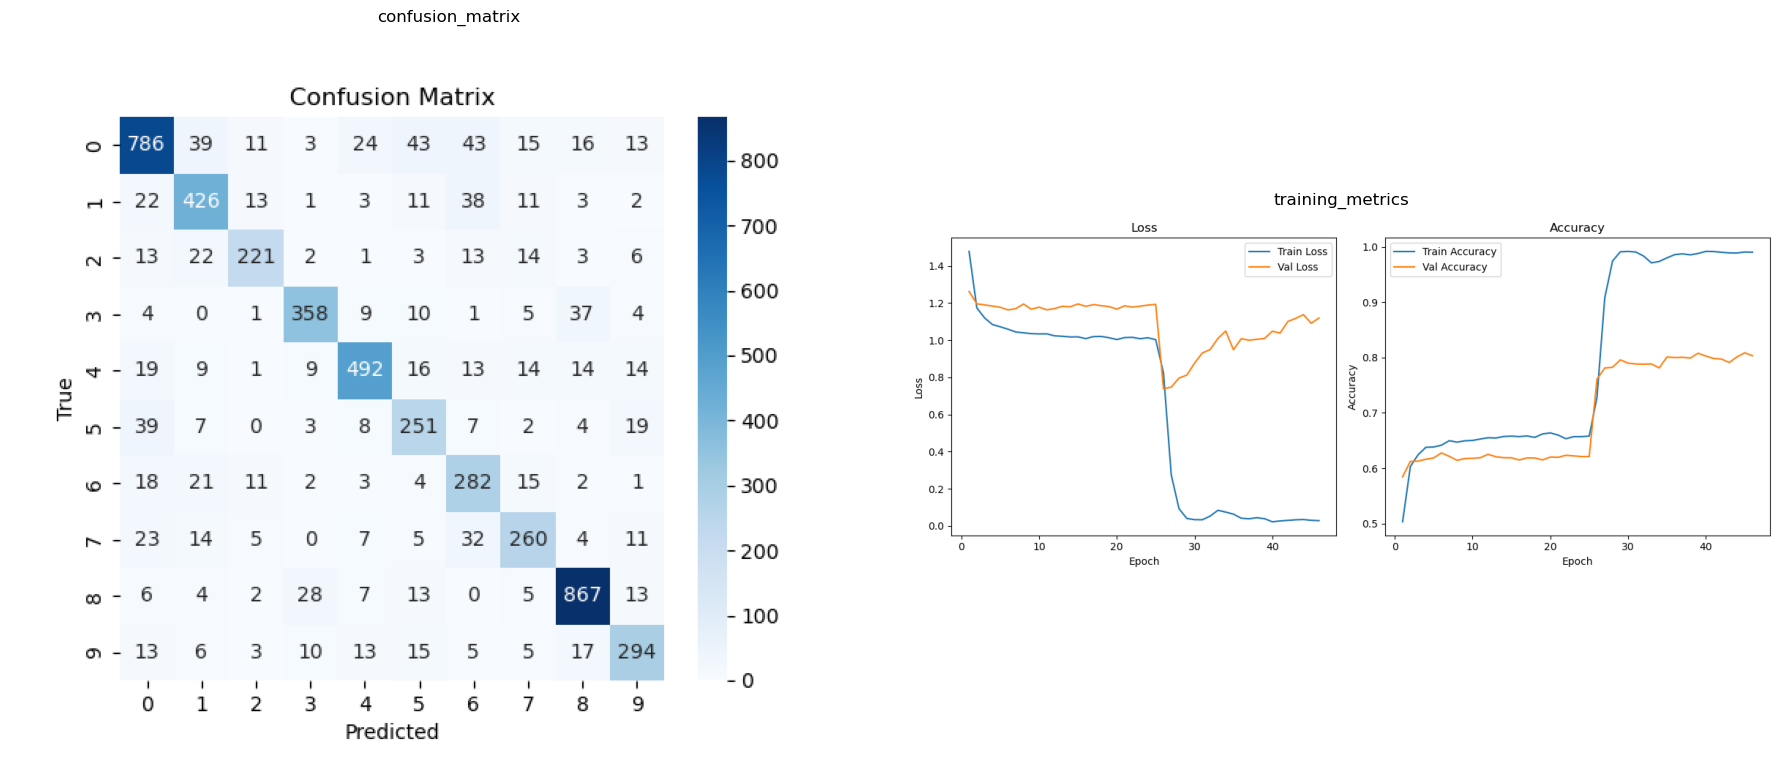

In [6]:
img1 = Image.open(paths['image_dir']/"resnet18_animals_confusion_matrix.png") 
img2 = Image.open(paths['image_dir']/"resnet18_animals_metrics.png") 

# Создаем фигуру с 1 строкой и 2 столбцами
fig, axs = plt.subplots(1, 2, figsize=(18, 8))  # (рядов, колонок)

# Отображаем первое изображение
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title("confusion_matrix")

# Отображаем второе изображение
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title("training_metrics")

# Показываем все вместе
plt.tight_layout()
plt.show()

In [ ]:
Test accuracy: 80.91%

In [ ]:
### Pytorch Resnet18 модль ожидаемо покзала себя лучше. Точность 80%. Но графики намекают на переобучение